## Sorting: Applications

----

In [1]:
## Define some function useful for testing
import random

## generate an array of n random integers up to b
def get_random_array(n, b = 50):
    return [random.randint(0, b) for _ in range(n)]

## Priority queue in Python 

A **heap** is managed by using python’s inbuilt library named ```heapq```. This library has the relevant functions to carry out various operations on heap data structure. Below is a list of these functions.

- ```heapify``` converts a regular list to a heap.
- ```heappush```  adds an element to the heap without altering the current heap.
- ```heappop``` returns (and removes) the smallest data element from the heap.

A heap is not a Python's object. It's just a normal list.

----


### Create a Heap

In [2]:
import heapq

H = [21, 1, 45, 78, 3, 5]

# Use heapify to rearrange the elements
heapq.heapify(H)

print(H)

[1, 3, 5, 78, 21, 45]


### Inserting into a Heap

In [3]:
print(H)

heapq.heappush(H, 0)

print(H)

[1, 3, 5, 78, 21, 45]
[0, 3, 1, 78, 21, 45, 5]


In [4]:
H[5] = -1
print(H)

m = heapq.heappop(H)
print(m)

[0, 3, 1, 78, 21, -1, 5]
0


We could use ```heappush``` to build a heap. However, this is slower as shown by the test below. 

In [5]:
def my_heapify(H):
    heap = []
    for x in H:
        heapq.heappush(heap, x)
    return heap

In [6]:
a = get_random_array(10000)
H = a[:]

%timeit heapq.heapify(H)
%timeit my_heapify(a)

352 µs ± 68.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.83 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Removing from heap 
We can remove the smallest element from heap by using ```heappop```.

In [7]:
H = [21,1,45,78,3,5]

# Use heapify to rearrange the elements
heapq.heapify(H)


print(H)
m = heapq.heappop(H)
print(m)
print(H)

[1, 3, 5, 78, 21, 45]
1
[3, 21, 5, 78, 45]


In [8]:
print(H[0])

3


### MAX-heap?


In [9]:
import heapq
minH = [21,1,45,78,3,5]
maxH = minH[:]

heapq.heapify(minH)             # for a min heap
print(minH)

heapq._heapify_max(maxH)        # for a max heap!!
print(maxH)

[1, 3, 5, 78, 21, 45]
[78, 21, 45, 1, 3, 5]


If you then want to pop elements, use the following.

In [10]:
m = heapq.heappop(minH)      # pop from minheap
print(m)

m = heapq._heappop_max(maxH) # pop from maxheap
print(m)

1
78


----

### Exercise: K-largest elements of a array

We want to compute the K-largest elements of a array A. **Report them sorted**.

There are three possible algorithms to solve this problem:


#### Algorithm 1: Sorting
The easiest way to solve this is by sorting the array in decreasing order and reporting the first K elements. 

This algorithm costs $\Theta(n\log n)$ time. 

Implement this algorithm in a function ```k_largest_sort(A, K)```and test its correctness.

#### Algorithm 2: QuickSelect
Implement the QuickSelect algorithm and use it to find the K-largest element E in the array A. Then, scan A again 
to collect the K elements larger than or equal to E. Finally, sort the collected elements.

This algorithm costs $\Theta(n + K\log K)$ time (in expectation). 

Implement this algorithm in a function ```k_largest_quickselect(A, K)```and test its correctness.


#### Algorithm 3: Heap
You have to implement the following faster algorithm as a function ```k_largest_heap(A,K)```.
- Scan the array from left to right and keep a min-heap. The min-heap will contain at most K elements.
- Insert the current element into the heap, if the heap has less than K elements or the current element is larger than the minimum in the heap. If the heap has more than K elements, remove the minimum. 
- Sort the collected elements.

This algorithm runs in $\Theta(n\log K)$ time.

Implement this algorithm in a function ```k_largest_heap(A, K)```and test its correctness.


**Compare the three solutions by varying the size of the array and the value K. Which one is the fastest?**

In [11]:
###############################################################
####### SOLUTION USING THE PYTHON IMPLEMENTED TIM SORT ########
###############################################################

def k_largest_sort(B, K):
    A = B[:] #copy array to avoid troubling the other algos
    A = sorted(A)[::-1]
    return A[:K]

###############################################################
############ SOLUTION BY IMPLEMENTING QUICK SORT ##############
###############################################################

#the previous was a little too quick compared to the quickselect thus I compared with this

def k_largest_sort_quickSort(B, K):
    def partition(A, low, high):
        pidx = random.randint(low, high) #choosing a random index of the current array
        A[high], A[pidx] = A[pidx], A[high] #swapping the random element chosen as pivot with the last element of the array
        pivot = A[high] 
        i = low-1 #getting a index to track where the left hand side of the partition should end, we'll swap the next element in case we find another element pertaining to the group, so we subtract one
      
        for j in range(low, high): #looping across the current array
            if A[j] >= pivot: #DESCENDING ORDER
                i = i+1 #moving the index on the right to swap
                A[i], A[j] = A[j], A[i] #swapping the element which should be on the left with the first element that's on the right so that each will be grouped together
      
        A[i+1], A[high] = A[high], A[i+1] #swapping the pivot (at last element position) with the first element of the right hand side
        return i+1 #it returns the index to consider for the left hand side (<= pivot) of the array

    def quickSort_rec(A, low, high): #it implements the divide and conquer approach
        if low < high: #until the array is of length 1 (if low is 0 and len(A) is 1 which results in high = 0, it stops)
            pi = partition(A, low, high) #divide the array into two sub arrays (it returns the index of the left side)
            quickSort_rec(A, low, pi-1) #it recursively repeat on the left hand side the partition algorithm
            quickSort_rec(A, pi+1, high) #the same on the right side

    def quickSort(B):
        A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
        quickSort_rec(A, 0, len(A)-1) #running the quicksort algorithm on the copied array
        return A

    A = quickSort(B)
    return A[:K]

In [12]:
###############################################################
##### SOLUTION USING DESCENDING ORDER PARTITION FUNCTION ######
###############################################################

def k_largest_quickselect(B, K):
    def partition(A, low, high):
        pidx = random.randint(low, high)
        A[high], A[pidx] = A[pidx], A[high] #swapping the random element chosen as pivot with the last element of the array
        pivot = A[high] 
        i = low-1 #getting a index to track where the left hand side of the partition should end, we'll swap the next element in case we find another element pertaining to the group, so we subtract one
      
        for j in range(low, high): #looping across the current array
            if A[j] >= pivot: ########## THE SORTING ORDER WOULD BE DESCENDING ##########
                i = i+1 #moving the index on the right to swap
                A[i], A[j] = A[j], A[i] #swapping the element which should be on the left with the first element that's on the right so that each will be grouped together
      
        A[i+1], A[high] = A[high], A[i+1] #swapping the pivot (at last element position) with the first element of the right hand side
        return i+1 #it returns the index to consider for the left hand side (<= pivot) of the array
    
    def QuickSelect(A, i, low, high):
        if low == high: #if the remaining element is 1 just return it
            return A[low]

        if low < high: #if there are elements in the current partition of the array
            pi = partition(A, low, high) #partition it
            k = pi - low + 1 ########## getting only the number of elements in the LEFT part of the partition (numbers higher than pivot, PIVOT included) ##########
            if k == i: #if the number in the left is equal to the input requested (lucky), return the kth largest element
                return A[k]
            if k > i: ########## else if the number of elements in LEFT partition is still greater, recursively apply on the LEFT ##########
                QuickSelect(A, i, low, pi-1)
            else: #if the number of elements is lower than the one input move to the RIGHT partition as the kth element is there
                QuickSelect(A, i-k, pi + 1, high)

    A = B[:] #copy array to avoid troubling the other algos
    QuickSelect(A, K, 0, len(A)-1)
    k_largest = A[:K] ########## as the elements needed are ordered in descending order, the largest elements are always on the left ##########
    return k_largest

###############################################################
###### SOLUTION USING ASCENDING ORDER PARTITION FUNCTION ######
###############################################################

def k_largest_quickselect_right_branches(B, K):
    def partition(A, low, high):
        pidx = random.randint(low, high)
        A[high], A[pidx] = A[pidx], A[high] #swapping the random element chosen as pivot with the last element of the array
        pivot = A[high]
        i = low-1 #getting a index to track where the left hand side of the partition should end, we'll swap the next element in case we find another element pertaining to the group, so we subtract one
      
        for j in range(low, high): #looping across the current array
            if A[j] <= pivot: ########## LOWEST ON THE LEFT, HIGHEST ON THE RIGHT ##########
                i = i+1 #moving the index on the right to swap
                A[i], A[j] = A[j], A[i] #swapping the element which should be on the left with the first element that's on the right so that each will be grouped together
      
        A[i+1], A[high] = A[high], A[i+1] #swapping the pivot (at last element position) with the first element of the right hand side
        return i+1 #it returns the index to consider for the left hand side (<= pivot) of the array
    
    def QuickSelect(A, i, low, high):
        if low == high: #if the remaining element is 1 just return it
            return A[low]

        if low < high: #if there are elements in the current partition of the array
            pi = partition(A, low, high) #partition it
            k = high - pi + 1 ########## getting only the number of elements in the RIGHT part of the partition (numbers higher than pivot, PIVOT included) ##########
            if k == i: #if the number in the right is equal to the input requested (lucky), return the kth largest element
                return A[k]
            if k > i: ########## else if the number of elements in RIGHT partition is still greater, recursively apply on the RIGHT ##########
                QuickSelect(A, i, pi + 1, high)
            else: #if the number of elements is lower than the one input move to the LEFT partition as the kth element is there
                QuickSelect(A, i-k, low, pi-1)

    A = B[:] #copy array to avoid troubling the other algos
    QuickSelect(A, K, 0, len(A)-1)
    k_largest = A[-K:] ########## as per the ascending order now the k elements will be in the last positions of the array ##########
    return k_largest

In [13]:
def k_largest_heap(A, K):

    import heapq

    k_heap = [A[i] for i in range(K)] #rebuild array with the first K elements
    heapq.heapify(k_heap) #heapify it (min heap)

    for i in range(K, len(A)): #loop in the rest of the array
        if A[i] >= k_heap[0]: #if element-i is larger or equal than the heap top element
            k_heap.pop(0) #delete the top element
            k_heap.append(A[i]) #add the current element to the heap
            heapq.heapify(k_heap) #heapify again in O(len(heap)) time
    return k_heap

In [14]:
from tqdm.auto import tqdm
for _ in tqdm(range(100)):
    a = get_random_array(200, 100)
    assert sorted(k_largest_heap(a, 10)) == sorted(a)[-10:], "FAIL!"

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
#TESTING
from tqdm import trange

a = get_random_array(1000000, 1000000000)

assert sorted(k_largest_sort(a, 10)) == sorted(a)[-10:], "FAIL!"

for _ in trange(10): #testing multiple times to check possible errors because of random pivot initialization
    assert sorted(k_largest_sort_quickSort(a, 10)) == sorted(a)[-10:], "FAIL!"
    assert sorted(k_largest_quickselect(a, 10)) == sorted(a)[-10:], "FAIL!"
    assert sorted(k_largest_quickselect_right_branches(a, 10)) == sorted(a)[-10:], "FAIL!"

assert sorted(k_largest_heap(a, 10)) == sorted(a)[-10:], "FAIL!"

100%|██████████| 10/10 [00:55<00:00,  5.55s/it]


In [16]:
a = get_random_array(50000, 100)
K = 10

%timeit k_largest_sort(a, K)
%timeit k_largest_sort_quickSort(a, K)
%timeit k_largest_quickselect(a, K)
%timeit k_largest_quickselect_right_branches(a, K)
%timeit k_largest_heap(a, K)

4.95 ms ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.12 s ± 261 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
31.3 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.7 ms ± 310 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.48 ms ± 80.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


---

### Exercise: compute distinct elements
You are given a list A of elements and you want to obtain the list of distict elements in A.

There are two possible algorithms to do this:

- Use ```list(set(A))```
- Sort A and then scan. Implement this as a function ```distinct(A)``` 

Compare these two approaches by varying the size of the array and the number of distinct elements.

In [17]:
#A = [10, 2, 3, 3, 4, 3, 4]
#distict(A) = [10, 2, 3, 4]
2, 3, 3, 3, 4, 4

(2, 3, 3, 3, 4, 4)

In [18]:
def distinct(B):
    A = B[:]
    A = sorted(A)
    A_i = 0

    C = [A[0]] #putting only the first element of sorted list to a new C list
    C_i = 0
    while A_i <= len(A)-1:
        if A[A_i] != C[C_i]:
            C.append(A[A_i])
            C_i += 1
        A_i += 1
    return C
        

In [19]:
## test your implementation
a = get_random_array(1000)

assert distinct(a) == sorted(list(set(a))), "FAIL!"

## What's the fastest approach?

In [20]:
def run_solution_performances():
    
    import matplotlib.pyplot as plt
    from tqdm.auto import tqdm

    n_elements = [10**n for n in range(1, 5)]
    possible_values = [10**n for n in range(1, 5)]

    list_set = list()
    distinct_func = list()

    for pv in tqdm(possible_values, desc = 'Main Loop', leave = True):
        #print('Possible Values:', pv, '\n#############')

        lise_temp = list()
        difu_temp = list()
        for n in tqdm(n_elements, desc = 'Sub-Loop', leave = False):
            #print('Length Array:', n)
            a = get_random_array(n, pv)
            
            #print('list-set method:', end = ' ')
            result = %timeit -o -q list(set(a))
            lise_temp.append((f'{n}_array_length', result.best))

            #print('distinct function:', end = ' ')
            result = %timeit -o -q distinct(a)
            difu_temp.append((f'{n}_array_length', result.best))
            #print()

        list_set.append((pv, dict(lise_temp)))
        distinct_func.append((f'{pv}_possible_values', dict(difu_temp)))

    fig, ax = plt.subplots(1, 4, figsize=(30,5))
    for ax_n in range(4):
        ax[ax_n].plot(list(list_set[ax_n][1].values()), label='List Set Method')
        ax[ax_n].plot(list(distinct_func[ax_n][1].values()), label='Distinct Function Method')
        ax[ax_n].set_title(f'Distinct Values allowed = {10**(ax_n+1)}')
        ax[ax_n].set_xlabel('Array Length')
        ax[ax_n].set_ylabel('Time required')
        ax[ax_n].set_xticks(range(4))
        ax[ax_n].set_xticklabels([10**n for n in range(1, 5)])
        ax[ax_n].legend(loc="best")
    plt.suptitle('Comparing Performances', fontsize=20)
    plt.show()

Main Loop:   0%|          | 0/4 [00:00<?, ?it/s]

Sub-Loop:   0%|          | 0/4 [00:00<?, ?it/s]

Sub-Loop:   0%|          | 0/4 [00:00<?, ?it/s]

Sub-Loop:   0%|          | 0/4 [00:00<?, ?it/s]

Sub-Loop:   0%|          | 0/4 [00:00<?, ?it/s]

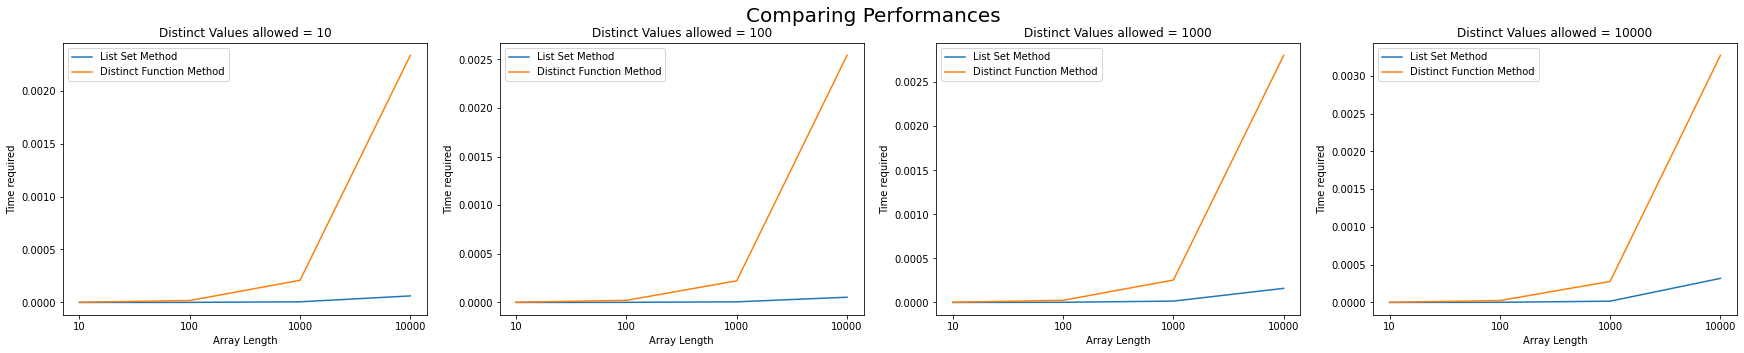

In [21]:
run_solution_performances()

---

### Exercise: Pareto frontier of a set of points in 2-D space (aka Skyline problem)
We are given a set $S$ of $n$ 2D points.
A point $(x,y)$ dominates a point $(x',y')$ iff $𝑥'\leq 𝑥$ and $y'\leq 𝑦$. 
Our goal is to find the set $P$ of dominating points in $S$. 
This corresponds to find the Pareto frontier (or, equivalently, the skyline). 

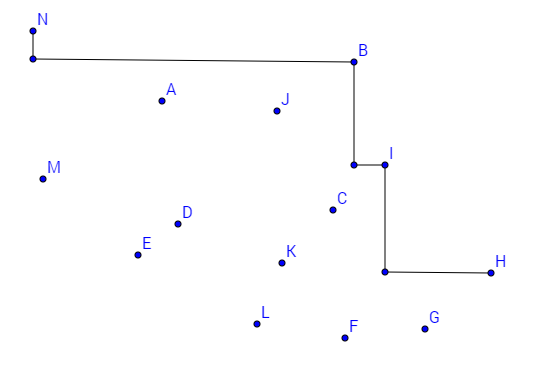

This problem has a lot of [applications](https://en.wikipedia.org/wiki/Multi-objective_optimization) (and [here](https://en.wikipedia.org/wiki/Pareto_efficiency)).

The problem can be solved in $\Theta(n\log n)$ time.

To find $P$ we need to sort points in $S$ by $x$ in descending order, 
and if $x$′𝑠 the same by $y$ in descending order. This takes $\Theta(n\log n)$ time. 
Then, we do the following.

- Include first point in $P$ and remember this point as $𝑇$. 
- Iterates through the points (let $C$ current point):
* if $C$ is dominated by $T$, then skip $C$ and go to next point;
* Otherwise, include $C$ in $P$ and set $𝑇=𝐶$.

This step can be performed in linear time.

Implement the function ```pareto_frontier(S)```, which returns the pareto frontier $P$ of the points in $S$.


In [22]:
def pareto_frontier(S):
    S = sorted(S, key = lambda x: (-x[0], -x[1])) #sorting in descending order

    T = S[0] #first point stored
    P = [T] #set of Pareto frontier points

    for C in S:
        if C[0] <= T[0] and C[1] <= T[1]: #if C is dominated by T
            continue
        else:
            P.append(C) #if not add to Pareto Frontier
            T = C #and set it ase the new frontier point to compare
    return sorted(P)

In [23]:
## Test your implementation here

S = [(6, 7.5), (7, 8), (8, 7), (2, 9), (3, 9.5), (1, 10), (4, 9), (5, 8)]

assert pareto_frontier(S) == [(1, 10), (3, 9.5), (4, 9), (7, 8), (8, 7)], "Fail!"